1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [54]:
#packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import scipy as sc
from scipy import stats
import pandas as pd
import seaborn as sns

In [3]:
#Fill a numpy array, x, of len(N) (with N=O(100)) with a variable normally distributed,
#with a given mean a standard deviation

mu, sigma = 0, 3 # mean and standard deviation
N = 500
x = np.random.normal(mu, sigma, N)

Freedman–Diaconis number of bins: 16
Poisson number of bins: 22


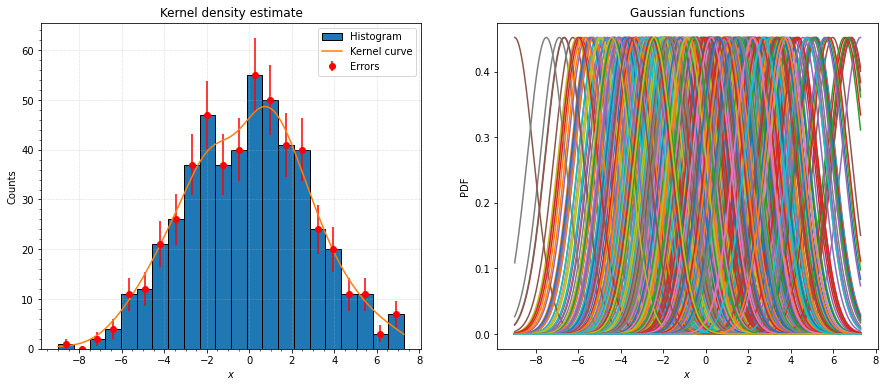

In [14]:
fig, (ax0, ax1)= plt.subplots(nrows=1, ncols=2 , figsize = (15,6))

#Freedman–Diaconis
q25, q75 = np.percentile(x, [25, 75])
bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
bins = round((x.max() - x.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)

#Poisson
pbins = int(np.sqrt(N))
print("Poisson number of bins:", pbins)

histo = ax0.hist(x, pbins, ec = "black", label = 'Histogram') #If True, draw and return a probability density (density=True)
points = 0.5*(histo[1][1:] + histo[1][:-1]) #0.5 * width
errors = ax0.errorbar(points, histo[0], yerr = pow(histo[0],0.5), fmt = 'o', color = 'r', label = 'Errors')
ax0.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax0.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax0.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax0.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax0.grid(linestyle = ":",linewidth = 0.5)
ax0.set_xlabel('$x$')
ax0.set_ylabel('Counts')
ax0.set_title('Kernel density estimate')
ax0.legend(loc='best')

std = 1.06*x.std()*pow(x.size,-1/5)
#norm.pdf(x, loc, scale) is identically equivalent to norm.pdf(y) / scale with y = (x - loc) / scale.
x_gauss = np.linspace(x.min(),x.max(),N)
mat = np.zeros((N,N))

for i in range(N):
    mat[i] = stats.norm.pdf(x_gauss, x[i], std)
    ax1.plot(x_gauss,mat[i])
    
ax1.set_title("Gaussian functions")
ax1.set_xlabel('$x$')
ax1.set_ylabel('PDF')

#Sum (with np.sum()) all the gaussian functions and normalize the result such that 
#the integral matches the integral of the original histogram. 
#For that you could use the scipy.integrate.trapz() method

g_sum = np.sum(mat,axis = 0)
inttrap = sc.integrate.trapz(y = g_sum, x = x_gauss ) #Integrate along the given axis using the composite trapezoidal rule.
norm = np.sum(np.diff(histo[1])*histo[0])/inttrap #out[i] = a[i+1] - a[i]
ax0.plot(x_gauss,g_sum*norm, label='Kernel curve')
ax0.legend(loc='best')

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

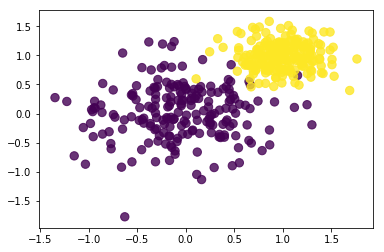

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)

In [32]:
#Function

def gauss2d(cat_num,pointnum): 
    
    for i in range(cat_num):
        #2 means needed
        mean = np.random.uniform(-20.,20., size = 2) #means range(-20,20)
        
        #covariance matrix needed for multivariate
        cov = np.random.uniform(-8.,8., size = (2,2)) #std range(-8,8)
        cov = np.dot(cov, cov.T) #positive-semidefinite
        
        dataset = np.random.multivariate_normal(mean, cov, pointnum)
        
        #Plot
        plt.title('Datasets')
        plt.xlabel('Variable 1')
        plt.ylabel('Variable 2')
        plt.scatter(dataset[:,0], dataset[:,1], label = "Category "+str(i+1), marker='.',alpha=0.6) 
        plt.legend(loc = 'best')
    return 


Display the dataset in a scatter plot marking the two categories with different marker colors.

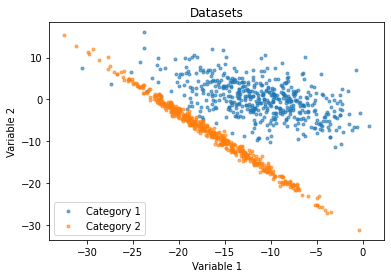

In [33]:
#2 categories with 500 points
cat_num = 2
pointnum = 500
gauss2d(cat_num,pointnum)

You can try to make the procedure more general by allowing a given number  𝑛≥2  of categories

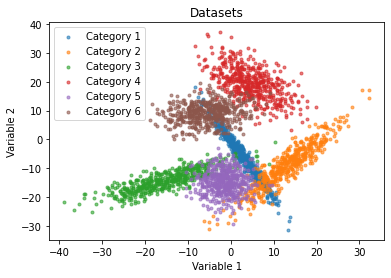

In [34]:
#6 categories with 500 points
cat_num = 6
pointnum = 500
gauss2d(cat_num,pointnum)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [38]:
#Download the following dataset
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2021-12-12 16:05:31--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2021-12-12 16:05:31--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1e03ed2619e20881f8b90a1979.dl.dropboxusercontent.com/cd/0/inline/BbvfgbTD5PZ_QPP7wjB07zZyFSo77kKi9uoCTa2LeExTVEOjFieZuj1G9vX9K7mxwdxmm1HyhbaFYAG6DxLZwMQzPSzCaOHFDQof_mRcd3S0EPliIfepa5AT2yTQkusDV9wjsc9WfpL-yZqE5jx2vmlf/file# [following]
--2021-12-12 16:05:31--  https://uc1e03ed2619e20881f8b90a1979.dl.dropboxusercontent.com/cd/0/inline/BbvfgbTD5PZ_QPP7wjB07zZyFSo77kKi9uoCTa2LeExTVEOjFieZuj1G9vX9K7mxwdxmm1Hy

In [45]:
#Load it as a pandas dataframe
#Inspect the dataset, you'll find two variables (features) : OK
df = pd.DataFrame(np.load('residuals_261.npy', allow_pickle = True).item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [44]:
df.describe()

,residuals,distances
count,11131.000000,11131.000000
mean,-0.616477,9.771465
std,4.163705,5.877819
min,-160.850000,0.000000
25%,-0.330000,4.400000
50%,-0.110000,9.700000
75%,0.060000,14.900000
max,11.320000,24.900000


In [42]:
#Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
clean = df[np.abs(df['residuals']) < 2]
clean

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [48]:
clean.describe()

,residuals,distances
count,10489.000000,10489.000000
mean,-0.121878,9.954824
std,0.439143,5.847142
min,-2.000000,0.000000
25%,-0.280000,4.700000
50%,-0.100000,10.000000
75%,0.070000,15.100000
max,1.992857,24.900000


* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot

Slope: 0.003260
Intercept: -0.154328


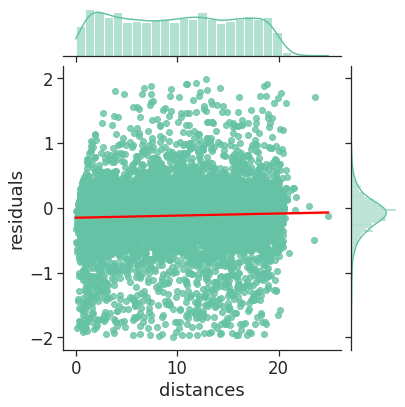

In [75]:
#X and Y
x = clean['distances']
y = clean['residuals']

slope, intercept, r, p, se = stats.linregress(x, y)
print(f"Slope: {slope:.6f}")
print(f"Intercept: {intercept:.6f}")

sns.jointplot(data = clean, x = "distances", y =  "residuals", kind = 'reg', line_kws = {'color' : 'r','label':'fitting curve'})

* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

Bin boundery:  [ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]
Bin centers [ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19.]


/home/ppprln96/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,residuals,distances,bin
0,1.100000,16.0,8.0
1,-1.950000,6.3,3.0
8,-0.042857,3.3,1.0
9,0.128571,5.3,2.0
10,0.085714,15.0,7.0
...,...,...,...
11126,-0.760000,14.4,7.0
11127,0.380000,7.5,3.0
11128,0.083333,1.7,0.0
11129,0.166667,19.1,9.0


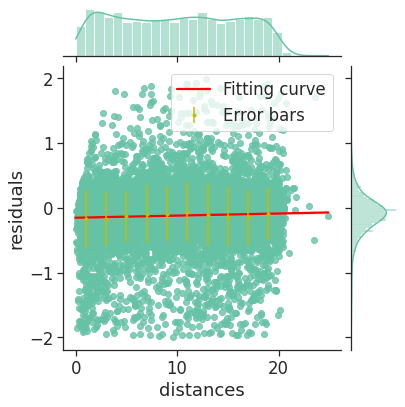

In [102]:
sea = sns.jointplot(data = clean, x = "distances", y =  "residuals", kind = 'reg', line_kws = {'color' : 'r','label':'Fitting curve'})

#reasonable number of steps (bins)
bins = 10                             
binboundery = np.linspace(0, 20, bins+1)
print("Bin boundery: ", binboundery)
x = (binboundery + 20/(bins*2))[:-1]   
print("Bin centers",x)

#assign a bin to each entry
for i in range(len(x)):
    mask = (clean["distances"] < binboundery[i+1]) & (binboundery[i] <= clean["distances"])  
    clean.loc[mask, "bin"] = int(i) #Access a group of rows and columns by label(s) or a boolean array.

y = clean.groupby("bin")["residuals"].mean().values    #mean of residuals in same bin
erry = clean.groupby("bin")["residuals"].std().values  

sea.ax_joint.errorbar(x, y, erry, label = 'Error bars', fmt = '.', c='y')
sea.ax_joint.legend(loc = "best")
clean